# About Dataset
### Aim
    Can we predict if a visitor, in a session, will add item(s) to the cart?

    The E-Commerce Store sells branded merchandise. Using Data Analytics and Machine Learning Models, let’s try and build a model that predicts whether each session will result in the visitor performing an action to add an item to the cart.

### Data Description
    * fullVisitorId: - The unique visitor ID.
    * deviceCategory:- The type of device (Mobile, Tablet, Desktop).
    * isMobile: - If the user is on a mobile device, this value is true, otherwise false.
    * operatingSystem: - The operating system of the device (e.g., "Macintosh" or "Windows").
    * browser: - The browser used (e.g., "Chrome" or "Firefox").
    * country: - The country from which sessions originated, based on IP address.
    * city: - Users' city, derived from their IP addresses or Geographical IDs
    * trafficSource: - The source of the traffic source. Could be the name of the search engine, the referring hostname, or 		a value of the utm_source URL parameter.
    * trafficMedium: - The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of the 			utm_medium URL parameter.
    * trafficCampaign: - The campaign value. Usually set by the utm_campaign URL parameter.
    * isFirstVisit: 0 if this is the first visit made by the visitor, otherwise 1.
    * totalVisits: - The total number of visits by the visitor across sessions.
    * totalHits: - The total number of interactions across sessions.
    * totalPageviews: - The total number of page views across sessions.
    * productPagesViewed: - The number of product pages viewed in the session.
    * addedToCart: - If the visitor added an item to the cart or made further downstream actions (checkout, transaction), 		otherwise 0 (if the visitor only browsed but never added an item to the cart).

    ** Target variable is addedToCart **

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [206]:
df=pd.read_csv("C:/Users/car/Desktop/Capstone Project/E-Com Data.csv") 

In [207]:
df.shape

(748134, 16)

In [208]:
df.head()

,fullVisitorId,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,productPagesViewed,addedToCart
0,4.210000e+18,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,0.0,0.0
1,3.540000e+18,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0
2,8.280000e+18,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,0.0,0.0
3,5.860000e+18,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0
4,2.620000e+18,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,1.0,1.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748134 entries, 0 to 748133
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fullVisitorId       748134 non-null  float64
 1   deviceCategory      748134 non-null  object 
 2   isMobile            748134 non-null  bool   
 3   operatingSystem     748134 non-null  object 
 4   browser             748134 non-null  object 
 5   country             748134 non-null  object 
 6   city                748134 non-null  object 
 7   trafficSource       748134 non-null  object 
 8   trafficMedium       748134 non-null  object 
 9   trafficCampaign     748134 non-null  object 
 10  isFirstVisit        748134 non-null  int64  
 11  totalVisits         748133 non-null  float64
 12  totalHits           748133 non-null  float64
 13  totalPageviews      748133 non-null  float64
 14  productPagesViewed  748133 non-null  float64
 15  addedToCart         748133 non-nul

In [210]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fullVisitorId,748134.0,4.507281e+18,3.069385e+18,4.820000e+12,1.600000e+18,4.390000e+18,7.200000e+18,3.580000e+19
isFirstVisit,748134.0,7.761591e-01,4.168170e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totalVisits,748133.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
totalHits,748133.0,4.648589e+00,9.888969e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+02
totalPageviews,748133.0,3.887324e+00,7.205425e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,4.690000e+02
productPagesViewed,748133.0,4.096798e-01,1.771054e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.680000e+02
addedToCart,748133.0,5.474160e-02,2.274753e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## Missing Values

In [211]:
a = df.isnull().sum()
b = df.isnull().sum()/df.shape[0]*100
missing_value = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
missing_value

,Count,Percentage
fullVisitorId,0,0.000000
deviceCategory,0,0.000000
isMobile,0,0.000000
operatingSystem,0,0.000000
browser,0,0.000000
country,0,0.000000
city,0,0.000000
trafficSource,0,0.000000
trafficMedium,0,0.000000
trafficCampaign,0,0.000000


In [212]:
# Dropping the NaN values, Since only 1 record from 5 columns is missing from 7 lakhs record which is 0.000134% 
df.dropna(axis=0,inplace=True)

In [213]:
df.isnull().sum()

fullVisitorId         0
deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
country               0
city                  0
trafficSource         0
trafficMedium         0
trafficCampaign       0
isFirstVisit          0
totalVisits           0
totalHits             0
totalPageviews        0
productPagesViewed    0
addedToCart           0
dtype: int64

## EDA

### Univariate Analysis

In [214]:
a = df['addedToCart'].value_counts()
b = df['addedToCart'].value_counts()/df.shape[0]*100
target_data = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
target_data

,Count,Percentage
0.0,707179,94.52584
1.0,40954,5.47416


<AxesSubplot: xlabel='addedToCart', ylabel='count'>

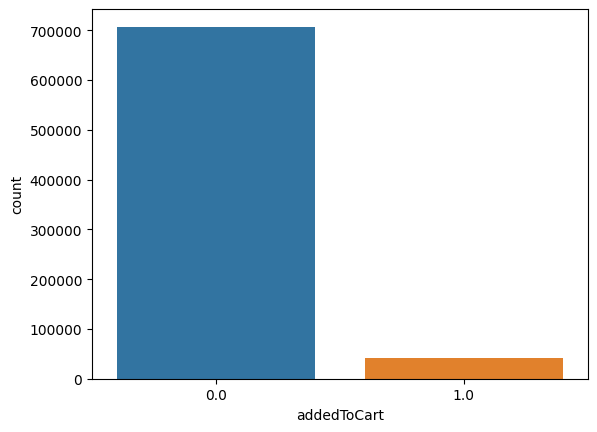

In [215]:
sns.countplot(x='addedToCart',data=df)

#### Observation: 
* Data is imbalanced with 94.5% of the visitor only browsed but never added an item to the cart

In [216]:
df.columns

Index(['fullVisitorId', 'deviceCategory', 'isMobile', 'operatingSystem',
       'browser', 'country', 'city', 'trafficSource', 'trafficMedium',
       'trafficCampaign', 'isFirstVisit', 'totalVisits', 'totalHits',
       'totalPageviews', 'productPagesViewed', 'addedToCart'],
      dtype='object')

#### (1)Device Category

In [217]:
a = df['deviceCategory'].value_counts()
b = df['deviceCategory'].value_counts()/df.shape[0]*100
device = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
device

,Count,Percentage
desktop,561478,75.050559
mobile,162440,21.712717
tablet,24215,3.236724


In [218]:
df['deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

Text(0.5, 1.0, 'Device Used by Visitors')

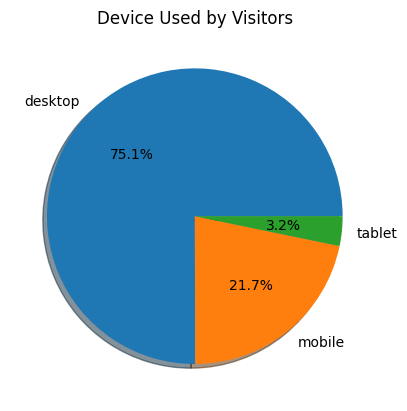

In [219]:
keys = ['desktop', 'mobile', 'tablet']

plt.pie(df['deviceCategory'].value_counts(), labels=keys, autopct='%.1f%%',shadow=True)
plt.title('Device Used by Visitors')

#### Observation: 
* 75.1% of the Visitors have used Desktop , 21.7% have used Mobile, & 3.2% have used Tablet

#### (1)Is Mobile

In [220]:
a = df['isMobile'].value_counts()
b = df['isMobile'].value_counts()/df.shape[0]*100
device = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
device

,Count,Percentage
False,561528,75.057242
True,186605,24.942758


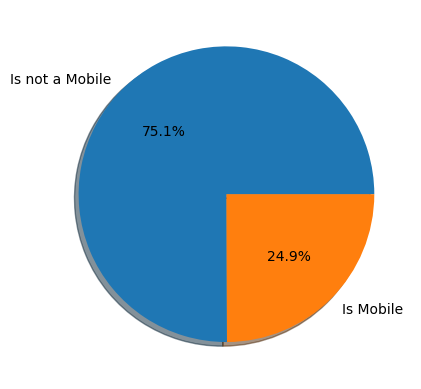

In [221]:
keys = ['Is not a Mobile','Is Mobile']

plt.pie(df['isMobile'].value_counts(), labels=keys, autopct='%.1f%%',shadow=True)
plt.show()

#### (2)Operating System

In [222]:
a = df['operatingSystem'].value_counts()
b = df['operatingSystem'].value_counts()/df.shape[0]*100
device = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
device

,Count,Percentage
Windows,294856,39.412244
Macintosh,217945,29.131852
Android,98237,13.130954
iOS,81964,10.955806
Linux,28243,3.775131
Chrome OS,21240,2.839067
Unix,3852,0.514882
Windows Phone,1103,0.147434
Samsung,214,0.028605
BlackBerry,190,0.025397


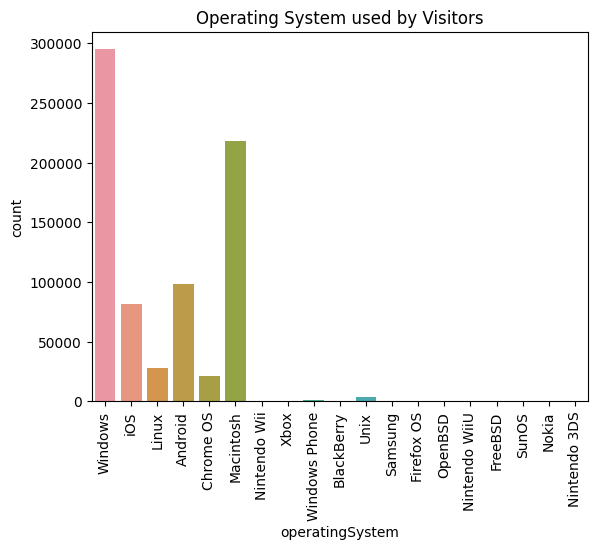

In [223]:
sns.countplot(x='operatingSystem',data=df)
plt.xticks(rotation = 90)
plt.title('Operating System used by Visitors')
plt.show()

In [224]:
df['operatingSystem'].unique()

array(['Windows', 'iOS', 'Linux', 'Android', 'Chrome OS', 'Macintosh',
       'Nintendo Wii', 'Xbox', 'Windows Phone', 'BlackBerry', 'Unix',
       'Samsung', 'Firefox OS', 'OpenBSD', 'Nintendo WiiU', 'FreeBSD',
       'SunOS', 'Nokia', 'Nintendo 3DS'], dtype=object)

#### Observation: 
* It is observed that maximum visitor use Windows OS.
* 39.4% of the Visitors use Windows , 29.13% use Machintosh, & 13.13% use Android

#### (3)Browser

In [225]:
a = df['browser'].value_counts()
b = df['browser'].value_counts()/df.shape[0]*100
browser = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
browser

,Count,Percentage
Chrome,510349,68.216347
Safari,155568,20.794164
Firefox,30592,4.089112
Internet Explorer,16429,2.196000
Edge,8227,1.099671
Android Webview,5582,0.746124
Opera,5033,0.672741
Opera Mini,4999,0.668197
Safari (in-app),4613,0.616602
YaBrowser,1909,0.255169


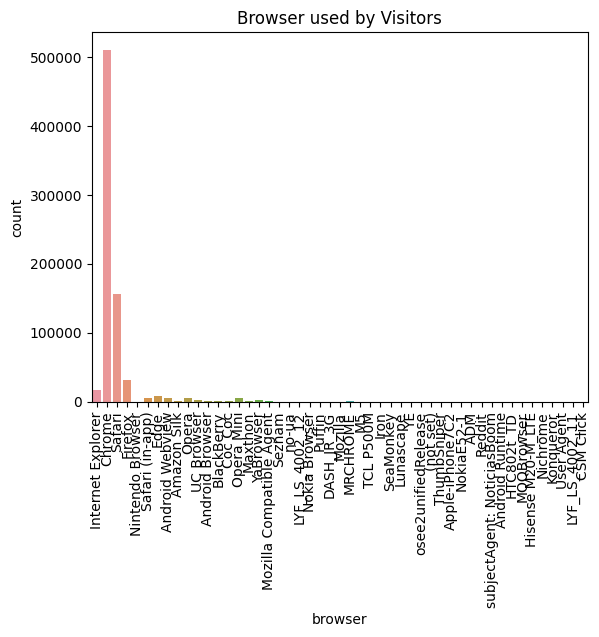

In [226]:
sns.countplot(x='browser',data=df)
plt.xticks(rotation = 90)
plt.title('Browser used by Visitors')
plt.show()

In [227]:
df['browser'].unique()

array(['Internet Explorer', 'Chrome', 'Safari', 'Firefox',
       'Nintendo Browser', 'Safari (in-app)', 'Edge', 'Android Webview',
       'Amazon Silk', 'Opera', 'UC Browser', 'Android Browser',
       'BlackBerry', 'Coc Coc', 'Opera Mini', 'Maxthon', 'YaBrowser',
       'Mozilla Compatible Agent', 'Seznam', 'no-ua', 'LYF_LS_4002_12',
       'Nokia Browser', 'Puffin', 'DASH_JR_3G', 'Mozilla', 'MRCHROME',
       'M5', 'TCL P500M', 'Iron', 'SeaMonkey', 'Lunascape', 'YE',
       'osee2unifiedRelease', '(not set)', 'ThumbSniper',
       'Apple-iPhone7C2', 'NokiaE52-1', 'ADM', 'Reddit',
       'subjectAgent: NoticiasBoom', 'Android Runtime', 'HTC802t_TD',
       'MQQBrowser', 'Hisense M20-M_LTE', 'Nichrome', 'Konqueror',
       'User Agent', 'LYF_LS_4002_11', 'CSM Click'], dtype=object)

#### Observation: 
* It is observed that maximum visitor use Chrome Browser.
* 68.20% of the Visitors use Chrome , & 20.79% use Safari

#### (4)Country

In [228]:
a = df['country'].value_counts()
b = df['country'].value_counts()/df.shape[0]*100
country = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
country

,Count,Percentage
United States,293532,39.235270
India,41166,5.502498
United Kingdom,29319,3.918956
Vietnam,23801,3.181386
Canada,20719,2.769427
...,...,...
São Tomé & Príncipe,1,0.000134
St. Martin,1,0.000134
Congo - Brazzaville,1,0.000134
Norfolk Island,1,0.000134


In [229]:
df['country'].nunique()

218

#### Observation: 
* It is observed that maximum visitors are from United States.
* 39.21% of the Visitors are from United States

#### (5)City

In [230]:
a = df['city'].value_counts()
b = df['city'].value_counts()/df.shape[0]*100
city = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
city

,Count,Percentage
not available in demo dataset,422375,56.457207
Mountain View,33182,4.435308
(not set),28205,3.770052
New York,21401,2.860588
San Francisco,16250,2.172074
...,...,...
Pescara,4,0.000535
Bozeman,3,0.000401
Boise,2,0.000267
Chisinau,2,0.000267


#### Observation: 
* City feature is dropped since ,Nearly 57% of the data is not available

#### (6)Traffic Source

In [231]:
a = df['trafficSource'].value_counts()
b = df['trafficSource'].value_counts()/df.shape[0]*100
traffic_source = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
traffic_source

,Count,Percentage
(direct),311921,41.693255
youtube.com,204233,27.299023
google,184922,24.717798
Partners,13258,1.772145
analytics.google.com,5487,0.733426
...,...,...
web.skype.com,1,0.000134
wap.sogou.com,1,0.000134
hosted.verticalresponse.com,1,0.000134
google.com.tw,1,0.000134


#### Observation: 
* 42% of traffic source is through Direct source 

#### (7)Traffic Medium

In [232]:
a = df['trafficMedium'].value_counts()
b = df['trafficMedium'].value_counts()/df.shape[0]*100
traffic_medium = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
traffic_medium

,Count,Percentage
(none),311920,41.693121
referral,227039,30.347411
organic,180972,24.189817
affiliate,13250,1.771075
cpc,9645,1.289209
cpm,5191,0.693861
paid,116,0.015505


<AxesSubplot: xlabel='trafficMedium', ylabel='count'>

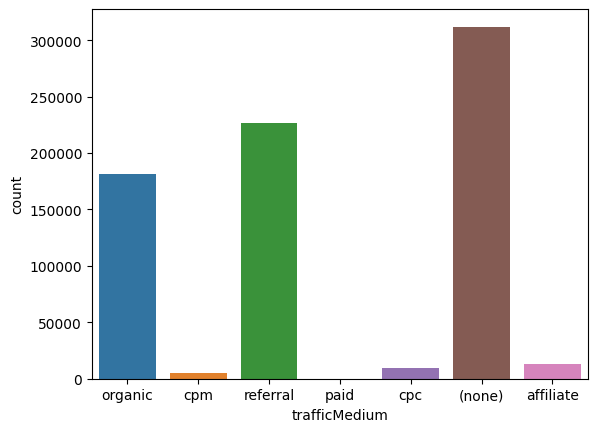

In [233]:
sns.countplot(x='trafficMedium',data=df)

#### Observation: 
* 42% of traffic source is through Direct source as observed above

#### (8)Traffic Campaign

In [234]:
a = df['trafficCampaign'].value_counts()
b = df['trafficCampaign'].value_counts()/df.shape[0]*100
traffic_campaign = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
traffic_campaign

,Count,Percentage
(not set),726506,97.109204
Data Share Promo,13250,1.771075
AW - Dynamic Search Ads Whole Site,4570,0.610854
AW - Accessories,3713,0.496302
AW - Electronics,73,0.009758
AW - Apparel,16,0.002139
All Products,4,0.000535
Data Share,1,0.000134


<AxesSubplot: xlabel='trafficCampaign', ylabel='count'>

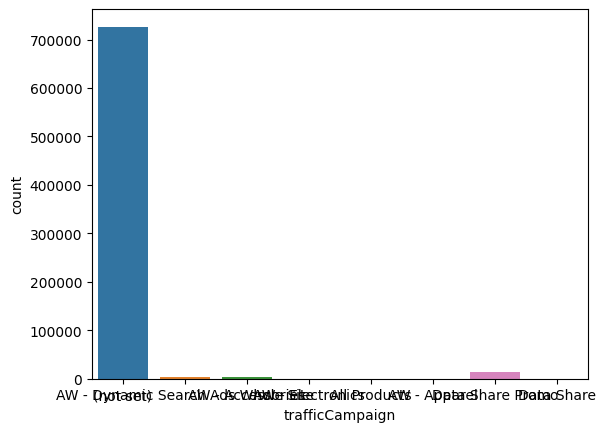

In [235]:
sns.countplot(x='trafficCampaign',data=df)

#### Observation: 
* Campaign is not set for 97% of the visitors

#### (9)First Visit

In [236]:
a = df['isFirstVisit'].value_counts()
b = df['isFirstVisit'].value_counts()/df.shape[0]*100
first_visit = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
first_visit

,Count,Percentage
1,580670,77.615878
0,167463,22.384122


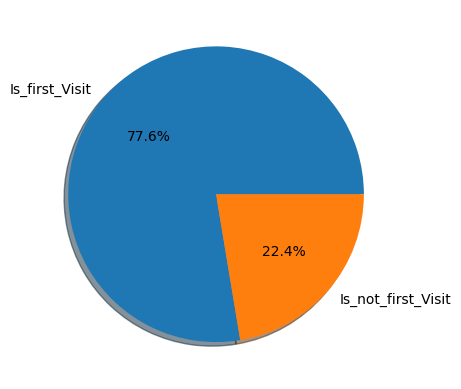

In [237]:
keys = ['Is_first_Visit','Is_not_first_Visit']

plt.pie(df['isFirstVisit'].value_counts(), labels=keys, autopct='%.1f%%',shadow=True)
plt.show()

#### Observation: 
* 77% of visitors are Visiting the website for the 1st time

#### (10)Total Visits

In [238]:
a = df['totalVisits'].value_counts()
b = df['totalVisits'].value_counts()/df.shape[0]*100
total_visit = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
total_visit

,Count,Percentage
1.0,748133,100.0


In [239]:
# Dropping this Feature as it doesn't give any Information
df.drop('totalVisits',axis=1,inplace=True)

#### Observation: 
* total Visits feature is dropped since ,it doesn't give any Information

#### (11)Total Hits

In [240]:
a = df['totalHits'].value_counts()
b = df['totalHits'].value_counts()/df.shape[0]*100
total_hits = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
total_hits

,Count,Percentage
1.0,369028,49.326523
2.0,116329,15.549241
3.0,57166,7.641155
4.0,34577,4.621772
5.0,25260,3.376405
...,...,...
199.0,1,0.000134
194.0,1,0.000134
243.0,1,0.000134
331.0,1,0.000134


#### Observation: 
* Less Interactions across session is observed

#### (12)Total Page Viewed

In [241]:
a = df['totalPageviews'].value_counts()
b = df['totalPageviews'].value_counts()/df.shape[0]*100
total_page_view = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
total_page_view

,Count,Percentage
1.0,373868,49.973467
2.0,121347,16.219977
3.0,60034,8.024509
4.0,36578,4.889238
5.0,27309,3.650287
...,...,...
196.0,1,0.000134
324.0,1,0.000134
144.0,1,0.000134
208.0,1,0.000134


#### Observation: 
* Most visitors have viewed less than 5 pages

#### (13)Product Pages Viewed

In [242]:
a = df['productPagesViewed'].value_counts()
b = df['productPagesViewed'].value_counts()/df.shape[0]*100
product_pages_view = pd.concat([a,b],axis=1,keys=['Count','Percentage'])
product_pages_view

,Count,Percentage
0.0,645504,86.281985
1.0,45002,6.015241
2.0,20267,2.709010
3.0,12616,1.686331
4.0,7387,0.987391
...,...,...
72.0,1,0.000134
121.0,1,0.000134
87.0,1,0.000134
168.0,1,0.000134


#### Observation: 
* Most visitors have viewed less than 5 pages

### Bivariate and Multivariate Analysis

<AxesSubplot: xlabel='isFirstVisit', ylabel='count'>

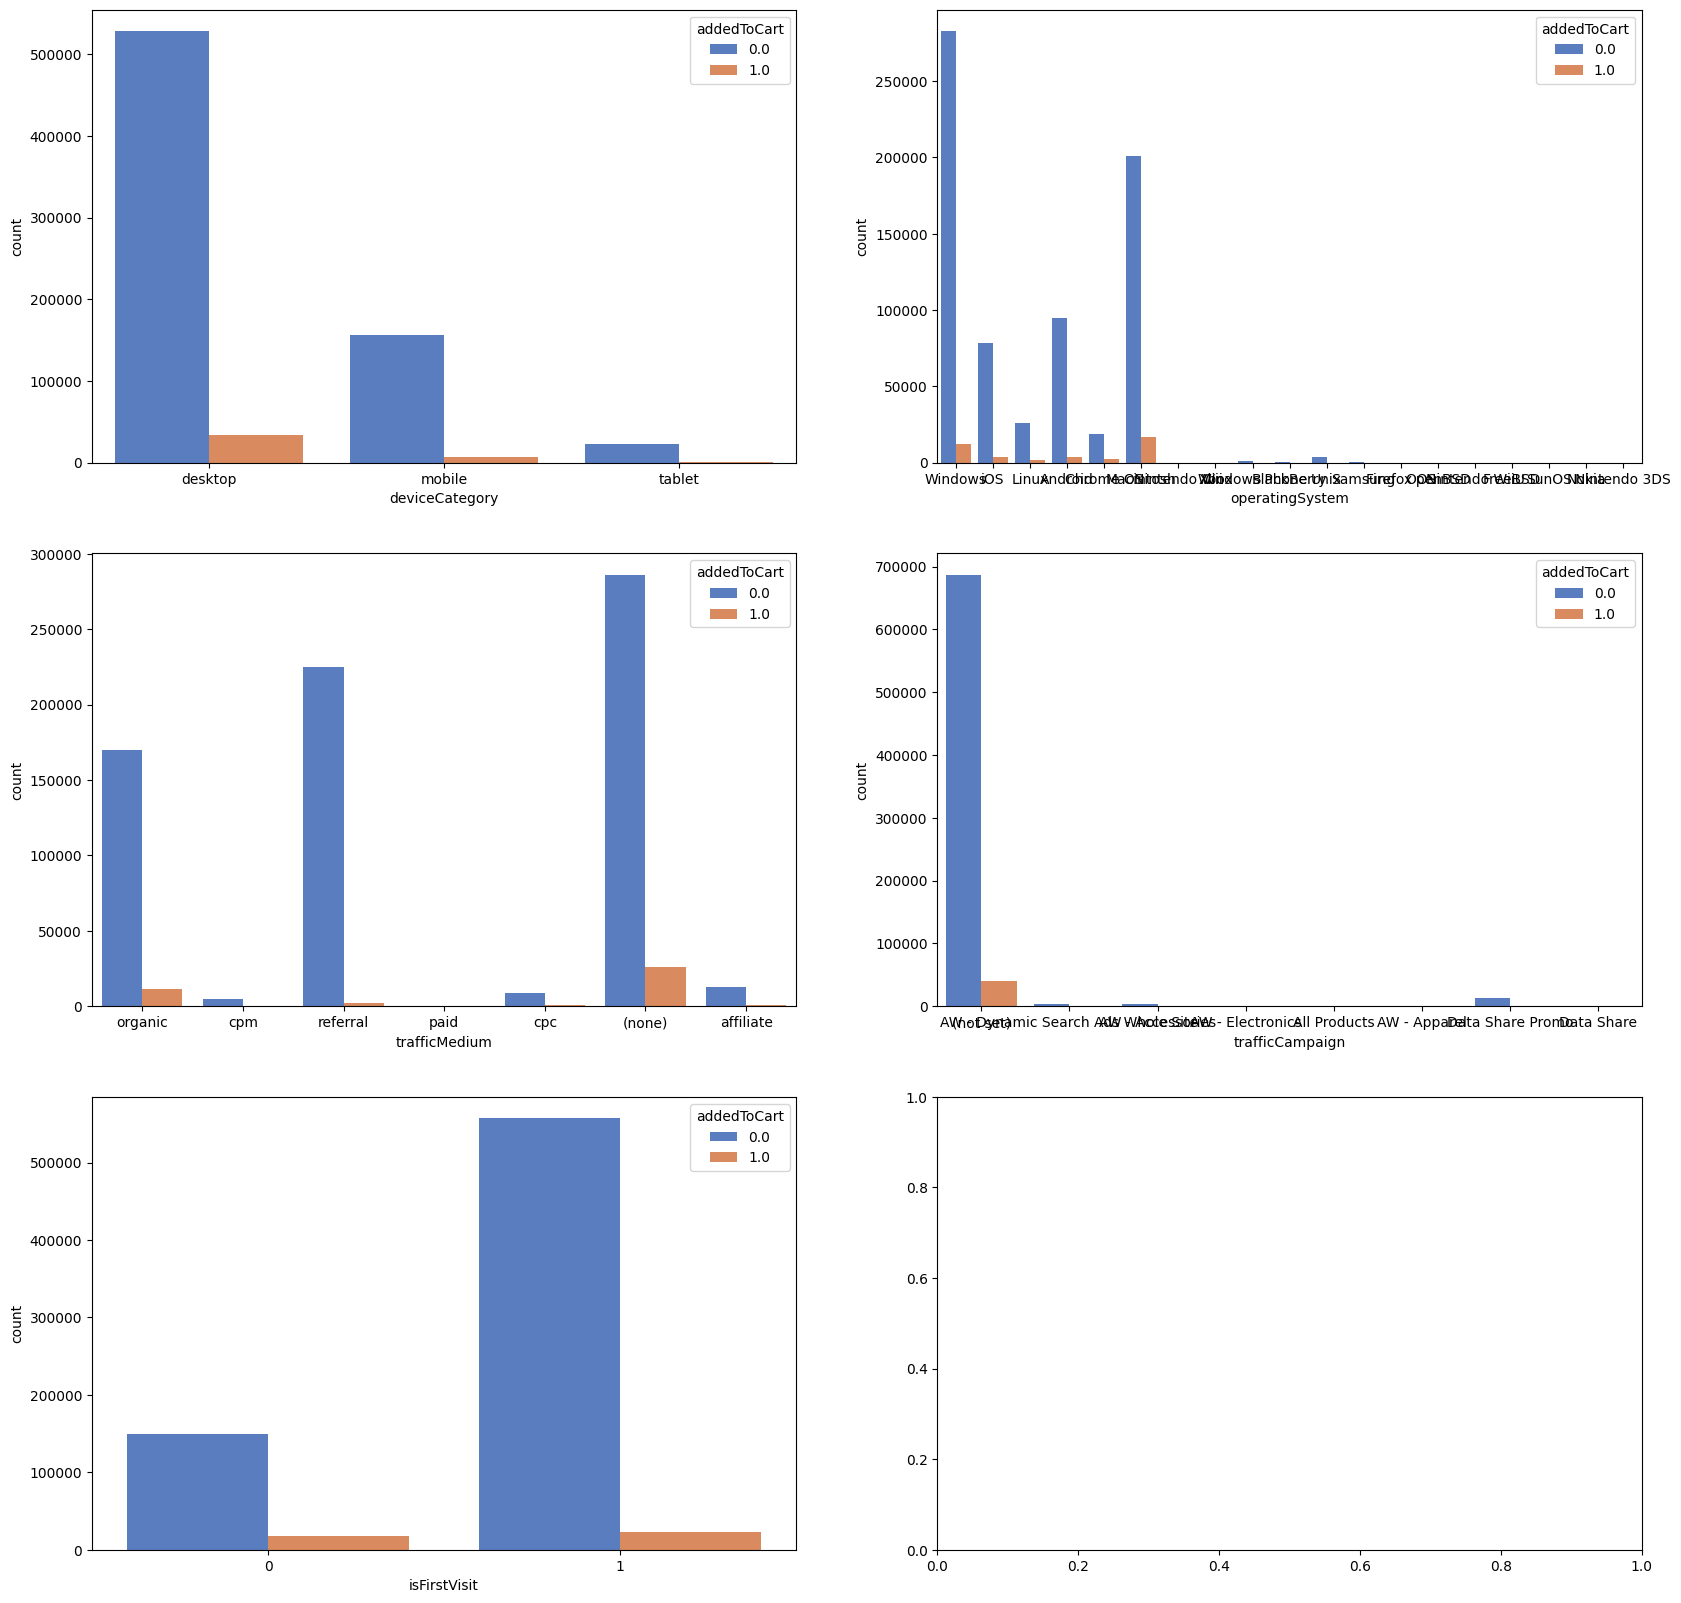

In [243]:
fig, axes = plt.subplots(3,2, figsize = (20, 20))
sns.countplot(data=df,x=df.deviceCategory,hue='addedToCart',palette='muted',ax=axes[0,0])
sns.countplot(data=df,x=df.operatingSystem,hue='addedToCart',palette='muted',ax=axes[0,1])
sns.countplot(data=df,x=df.trafficMedium,hue='addedToCart',palette='muted',ax=axes[1,0])
sns.countplot(data=df,x=df.trafficCampaign,hue='addedToCart',palette='muted',ax=axes[1,1])
sns.countplot(data=df,x=df.isFirstVisit,hue='addedToCart',palette='muted',ax=axes[2,0])

#### Observation: 
* Those who use desktop are observed to add products in the cart compared to those who use other devices
* Windows users are more likely to add products in the cart compared to Macintosh users
* Android users are more likely to add products in the cart compared to IOS users
* Most users have not added products on their first visit

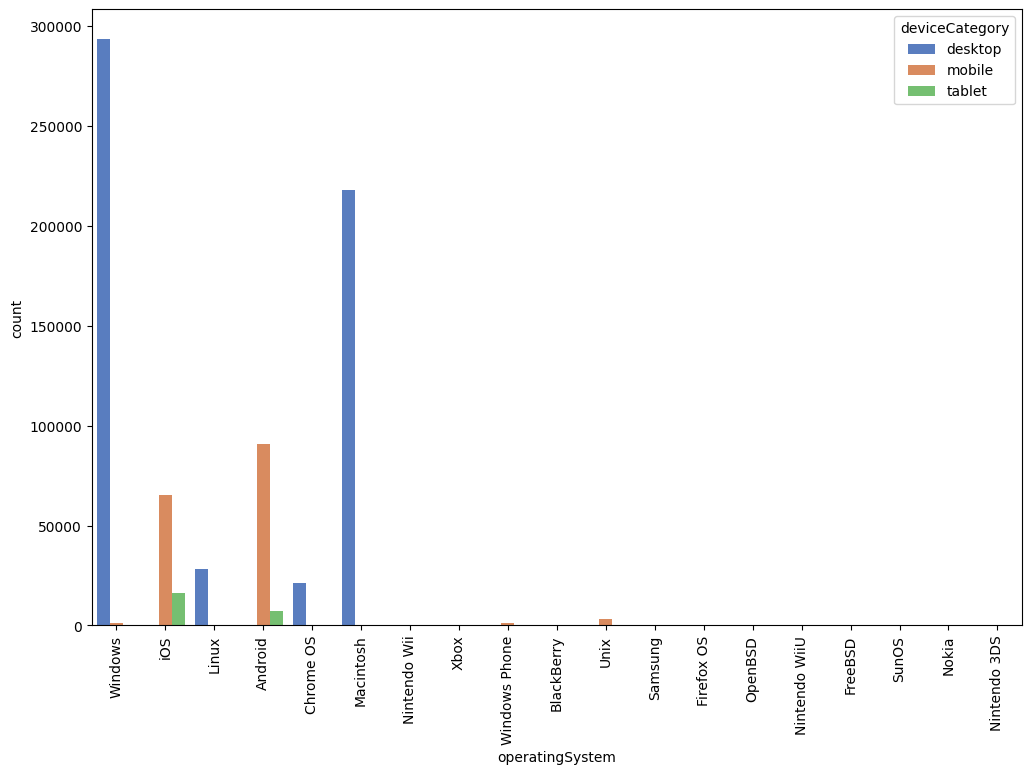

In [244]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df.operatingSystem,hue='deviceCategory',palette='muted')
plt.xticks(rotation = 90)
plt.show()

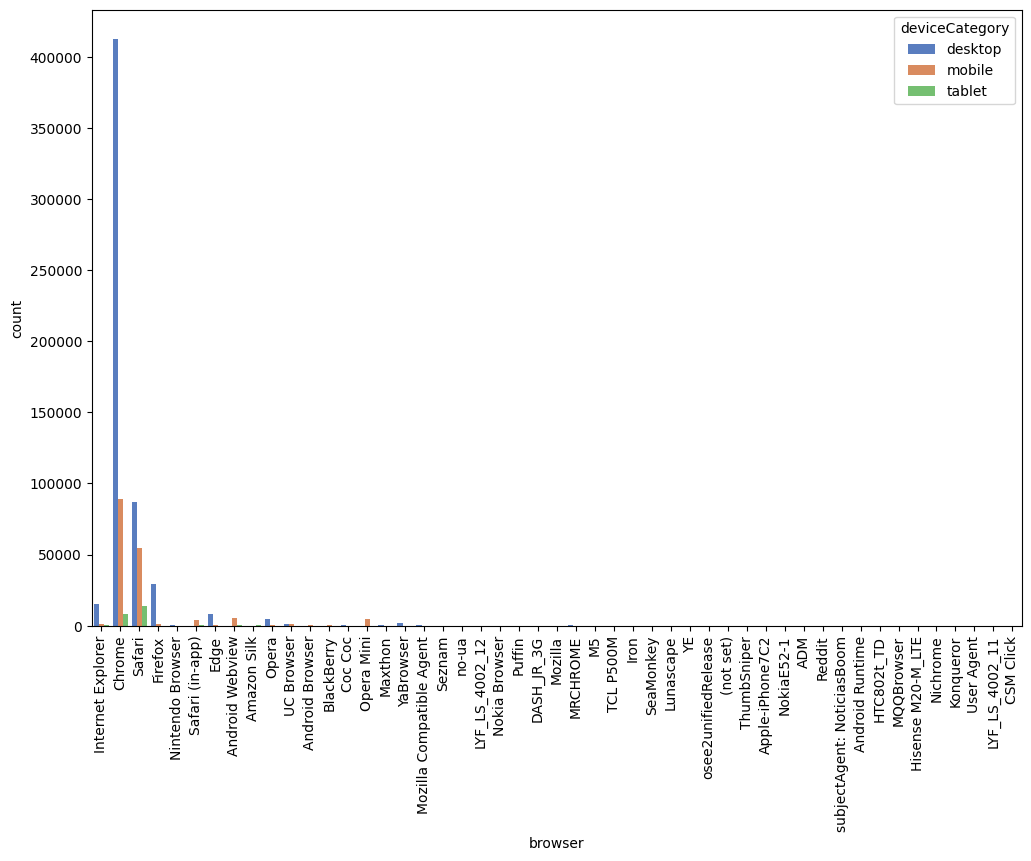

In [245]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df.browser,hue='deviceCategory',palette='muted')
plt.xticks(rotation = 90)
plt.show()

#### Observation: 
* Most users use chrome browser to browse both on desktop and mobile
* In tablet its safari browser since most of them use IOS device

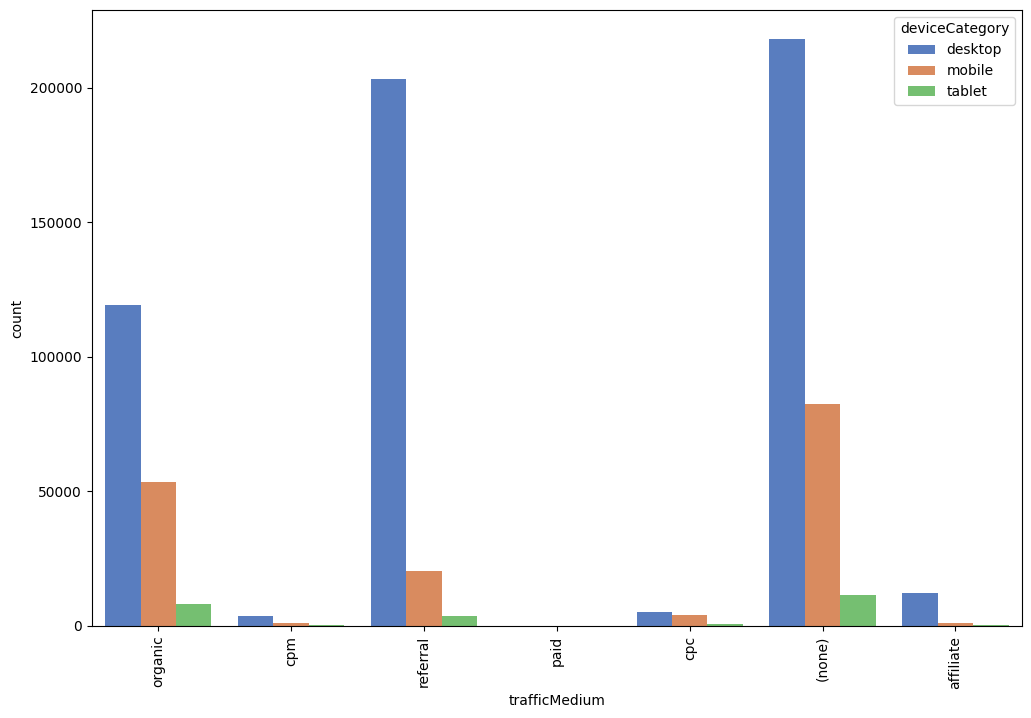

In [246]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df.trafficMedium,hue='deviceCategory',palette='muted')
plt.xticks(rotation = 90)
plt.show()

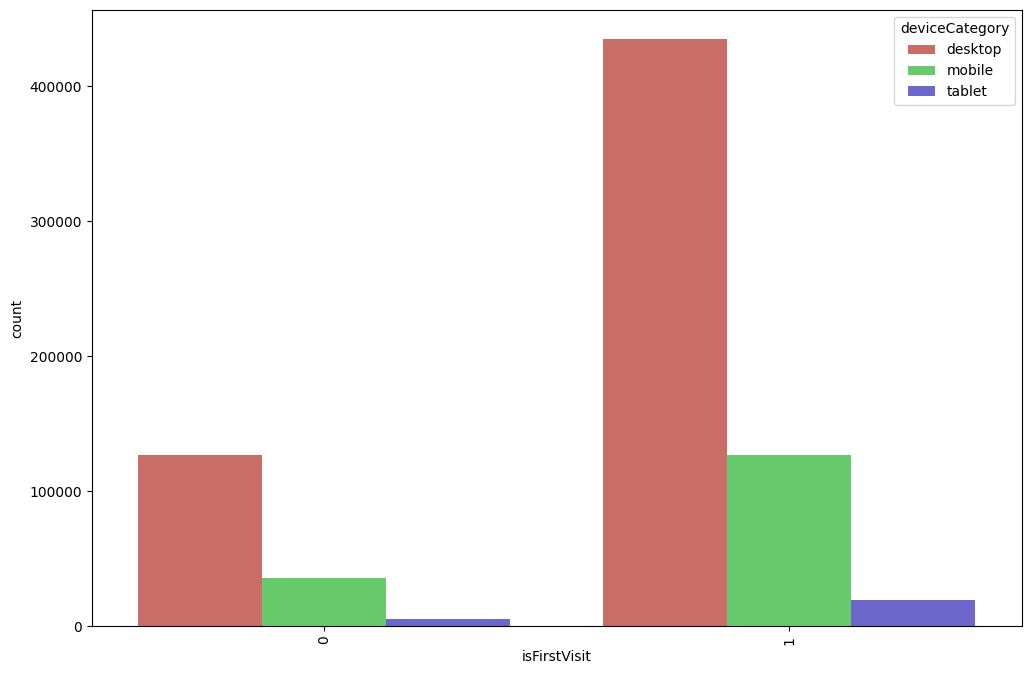

In [247]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x=df.isFirstVisit,hue='deviceCategory',palette='hls')
plt.xticks(rotation = 90)
plt.show()

#### Observation: 
* Most users have not added products on their first visit
* Mostly Desktop is used in their subsequent visits to add products

### Checking Multicollinearity

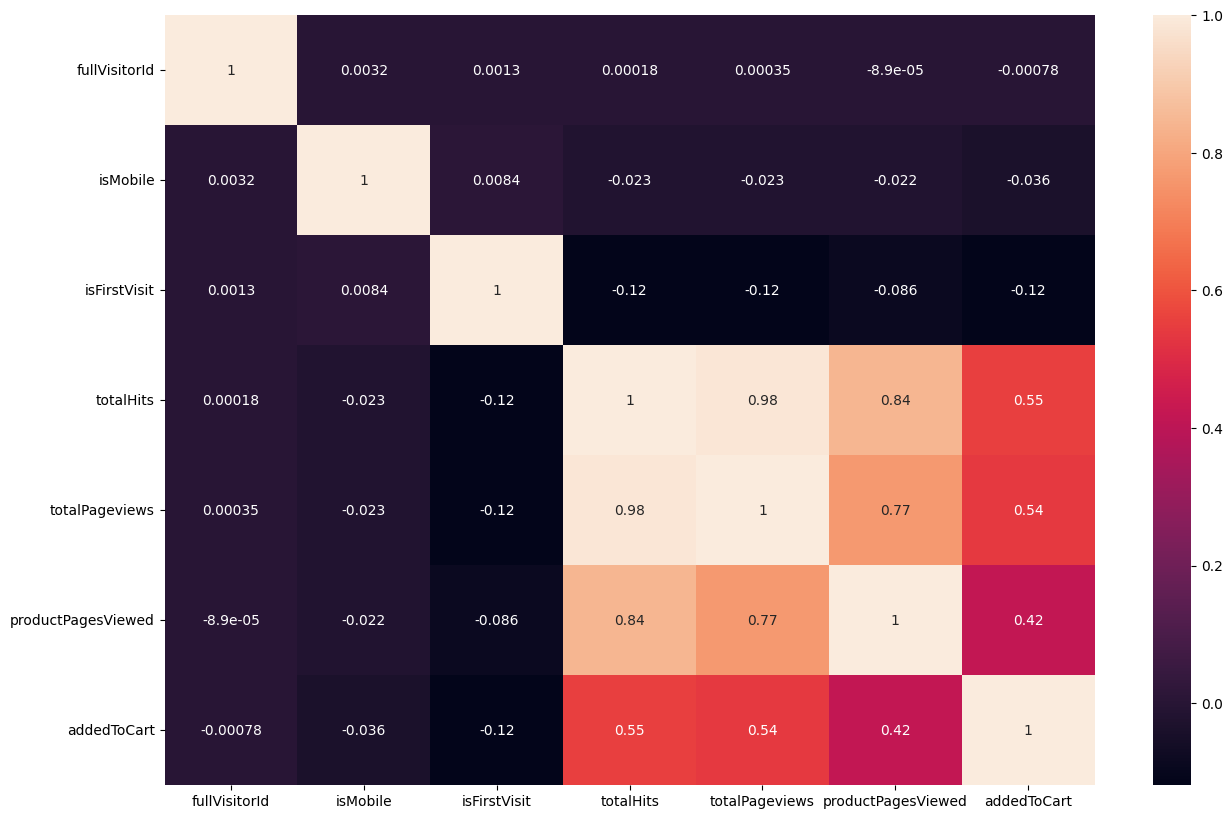

In [248]:
plt.figure(figsize=[15,10])
sns.heatmap(data=df.corr(),annot=True)
plt.show()

## Feature Engineering 

### Feature Selection

In [249]:
df.columns

Index(['fullVisitorId', 'deviceCategory', 'isMobile', 'operatingSystem',
       'browser', 'country', 'city', 'trafficSource', 'trafficMedium',
       'trafficCampaign', 'isFirstVisit', 'totalHits', 'totalPageviews',
       'productPagesViewed', 'addedToCart'],
      dtype='object')

In [250]:
#dropping the 'fullVisitorId' as it as Unique Id
df.drop('fullVisitorId',axis=1,inplace=True)

In [251]:
# * Dropping isMobile feature as the deviceCategory feature already gives us the information
df.drop('isMobile',axis=1,inplace=True)

In [252]:
# Dropping city Feature as Nearly 57% of the data is not available
df.drop('city',axis=1,inplace=True)

In [253]:
# Dropping totalHits Feature as it is positively correlated to totalPageviews
df.drop('totalHits',axis=1,inplace=True)

In [254]:
df.columns

Index(['deviceCategory', 'operatingSystem', 'browser', 'country',
       'trafficSource', 'trafficMedium', 'trafficCampaign', 'isFirstVisit',
       'totalPageviews', 'productPagesViewed', 'addedToCart'],
      dtype='object')

### Feature Encoding

In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
le = LabelEncoder()

In [257]:
cat = ['deviceCategory', 'operatingSystem', 'browser', 'country', 'trafficSource', 'trafficMedium', 'trafficCampaign']

In [258]:
df[cat] = le.fit_transform(cat)

In [259]:
df.head()

,deviceCategory,operatingSystem,browser,country,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalPageviews,productPagesViewed,addedToCart
0,2,3,0,1,6,5,4,0,2.0,0.0,0.0
1,2,3,0,1,6,5,4,0,1.0,0.0,0.0
2,2,3,0,1,6,5,4,0,2.0,0.0,0.0
3,2,3,0,1,6,5,4,0,1.0,0.0,0.0
4,2,3,0,1,6,5,4,0,12.0,1.0,1.0


## Model Building

### Train-Test Split

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Handling the Imbalance in the dataset

In [263]:
from imblearn.over_sampling import SMOTE

In [264]:
from collections import Counter
counter = Counter(y_train)
print('Before',counter)

smt = SMOTE()

X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 495106, 1.0: 28587})
After Counter({0.0: 495106, 1.0: 495106})


## Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
log = LogisticRegression()

In [267]:
log.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [268]:
log_predict = log.predict(X_test)

### Logistic Regression Model Evaluation

In [269]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score

In [270]:
import scikitplot

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.95    212073
         1.0       0.37      0.85      0.52     12367

    accuracy                           0.91    224440
   macro avg       0.68      0.88      0.73    224440
weighted avg       0.96      0.91      0.93    224440

________________________________________________________________________________


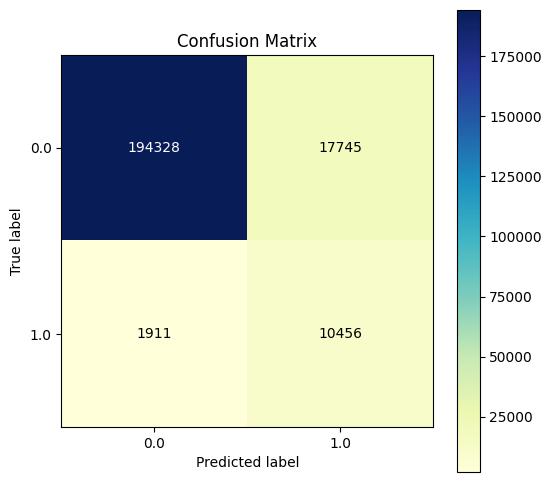

In [271]:
scikitplot.metrics.plot_confusion_matrix(y_test, log_predict, figsize=(6,6), cmap= 'YlGnBu')
print('\x1B[4m' + 'Classification Report:' + '\x1B[0m','\n',classification_report(y_test,log_predict))
print('_'*80)

In [272]:
lr_report = pd.Series({'Model': "Logistic Regression",
                       'Training Score': log.score(X_train_sm,y_train_sm),
                       'Accuracy Score': accuracy_score(y_test,log_predict),
                       'Precision Score': precision_score(y_test,log_predict),
                       'Recall Score': recall_score(y_test,log_predict),
                       'F1 Score' : f1_score(y_test,log_predict)})
lr_report

Model              Logistic Regression
Training Score                 0.88081
Accuracy Score                0.912422
Precision Score               0.370767
Recall Score                  0.845476
F1 Score                       0.51548
dtype: object

In [273]:
models_report = pd.DataFrame()
models_report['Logistic Regresion'] = lr_report
models_report

,Logistic Regresion
Model,Logistic Regression
Training Score,0.88081
Accuracy Score,0.912422
Precision Score,0.370767
Recall Score,0.845476
F1 Score,0.51548


## Decision Tree

In [274]:
from sklearn.tree import DecisionTreeClassifier

In [275]:
dt=DecisionTreeClassifier()

In [276]:
dt.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [277]:
dt_pred = dt.predict(X_test)

### Decision Tree Model Evaluation

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.95    212073
         1.0       0.35      0.91      0.51     12367

    accuracy                           0.90    224440
   macro avg       0.67      0.91      0.73    224440
weighted avg       0.96      0.90      0.92    224440

________________________________________________________________________________


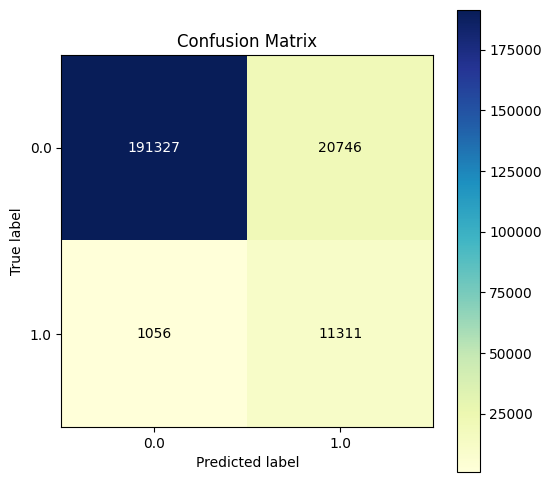

In [278]:
scikitplot.metrics.plot_confusion_matrix(y_test, dt_pred, figsize=(6,6), cmap= 'YlGnBu')
print('\x1B[4m' + 'Classification Report:' + '\x1B[0m','\n',classification_report(y_test,dt_pred))
print('_'*80)

In [279]:
dt_report = pd.Series({'Model': "Decision Tree",
                       'Training Score': dt.score(X_train_sm,y_train_sm),
                       'Accuracy Score': accuracy_score(y_test,dt_pred),
                       'Precision Score': precision_score(y_test,dt_pred),
                       'Recall Score': recall_score(y_test,dt_pred),
                       'F1 Score' : f1_score(y_test,dt_pred)})

models_report['DT'] = dt_report
models_report


,Logistic Regresion,DT
Model,Logistic Regression,Decision Tree
Training Score,0.88081,0.919054
Accuracy Score,0.912422,0.90286
Precision Score,0.370767,0.35284
Recall Score,0.845476,0.914611
F1 Score,0.51548,0.509229


## Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rf = RandomForestClassifier(n_estimators=50)

In [282]:
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=50)

In [283]:
rf_pred = rf.predict(X_test)

### Random Forest Model Evaluation

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.95    212073
         1.0       0.35      0.92      0.51     12367

    accuracy                           0.90    224440
   macro avg       0.67      0.91      0.73    224440
weighted avg       0.96      0.90      0.92    224440

________________________________________________________________________________


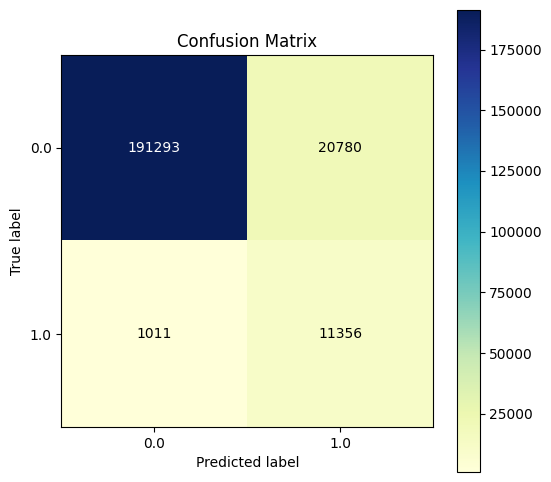

In [284]:
scikitplot.metrics.plot_confusion_matrix(y_test, rf_pred, figsize=(6,6), cmap= 'YlGnBu')
print('\x1B[4m' + 'Classification Report:' + '\x1B[0m','\n',classification_report(y_test,rf_pred))
print('_'*80)

In [285]:
rf_report = pd.Series({'Model': "Random Forest",
                       'Training Score': rf.score(X_train_sm,y_train_sm),
                       'Accuracy Score': accuracy_score(y_test,rf_pred),
                       'Precision Score': precision_score(y_test,rf_pred),
                       'Recall Score': recall_score(y_test,rf_pred),
                       'F1 Score' : f1_score(y_test,rf_pred)})

models_report['RF'] = rf_report
models_report


,Logistic Regresion,DT,RF
Model,Logistic Regression,Decision Tree,Random Forest
Training Score,0.88081,0.919054,0.919053
Accuracy Score,0.912422,0.90286,0.902909
Precision Score,0.370767,0.35284,0.353373
Recall Score,0.845476,0.914611,0.91825
F1 Score,0.51548,0.509229,0.510348


## AdaBoost Classifier

In [286]:
from sklearn.ensemble import AdaBoostClassifier

In [287]:
ab = AdaBoostClassifier()

In [288]:
ab.fit(X_train_sm,y_train_sm)

AdaBoostClassifier()

In [289]:
ab_pred = ab.predict(X_test)

### AdaBoost Model Evaluation

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.94    212073
         1.0       0.35      0.94      0.50     12367

    accuracy                           0.90    224440
   macro avg       0.67      0.92      0.72    224440
weighted avg       0.96      0.90      0.92    224440

________________________________________________________________________________


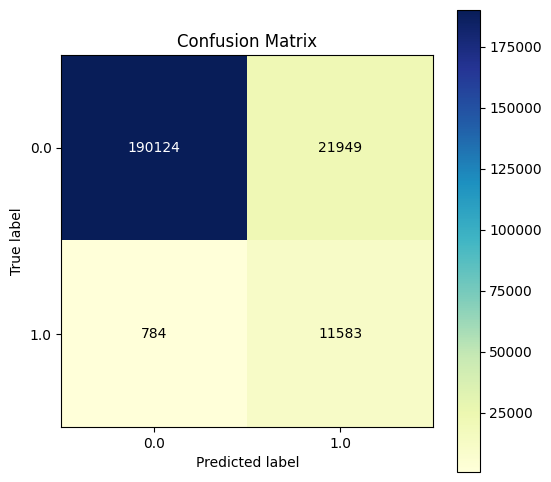

In [290]:
scikitplot.metrics.plot_confusion_matrix(y_test, ab_pred, figsize=(6,6), cmap= 'YlGnBu')
print('\x1B[4m' + 'Classification Report:' + '\x1B[0m','\n',classification_report(y_test,ab_pred))
print('_'*80)

In [291]:
ab_report = pd.Series({'Model': "AdaBoost Classifier",
                       'Training Score': ab.score(X_train_sm,y_train_sm),
                       'Accuracy Score': accuracy_score(y_test,ab_pred),
                       'Precision Score': precision_score(y_test,ab_pred),
                       'Recall Score': recall_score(y_test,ab_pred),
                       'F1 Score' : f1_score(y_test,ab_pred)})

models_report['AdaBoost'] = ab_report
models_report


,Logistic Regresion,DT,RF,AdaBoost
Model,Logistic Regression,Decision Tree,Random Forest,AdaBoost Classifier
Training Score,0.88081,0.919054,0.919053,0.917561
Accuracy Score,0.912422,0.90286,0.902909,0.898712
Precision Score,0.370767,0.35284,0.353373,0.345431
Recall Score,0.845476,0.914611,0.91825,0.936605
F1 Score,0.51548,0.509229,0.510348,0.504717


## XGBoost Classifier

In [292]:
from xgboost import XGBClassifier

In [293]:
xgb = XGBClassifier()

In [294]:
xgb.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [295]:
xgb_pred = xgb.predict(X_test)

### XGBoost Model Evaluation

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95    212073
         1.0       0.35      0.93      0.51     12367

    accuracy                           0.90    224440
   macro avg       0.67      0.91      0.73    224440
weighted avg       0.96      0.90      0.92    224440

________________________________________________________________________________


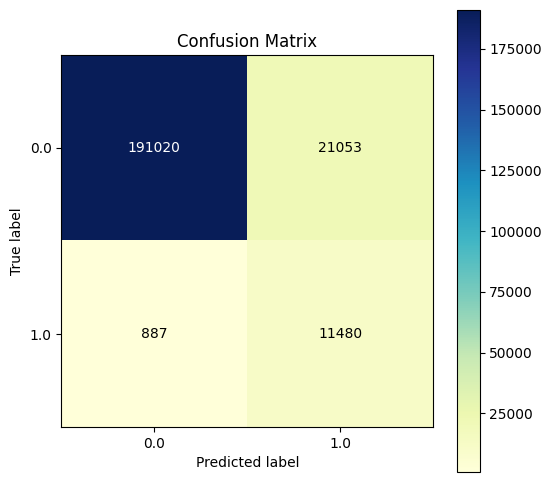

In [296]:
scikitplot.metrics.plot_confusion_matrix(y_test, xgb_pred, figsize=(6,6), cmap= 'YlGnBu')
print('\x1B[4m' + 'Classification Report:' + '\x1B[0m','\n',classification_report(y_test,xgb_pred))
print('_'*80)

In [297]:
xgb_report = pd.Series({'Model': "XGBoost Classifier",
                       'Training Score': ab.score(X_train_sm,y_train_sm),
                       'Accuracy Score': accuracy_score(y_test,xgb_pred),
                       'Precision Score': precision_score(y_test,xgb_pred),
                       'Recall Score': recall_score(y_test,xgb_pred),
                       'F1 Score' : f1_score(y_test,xgb_pred)})

models_report['XGBoost'] = xgb_report
models_report

,Logistic Regresion,DT,RF,AdaBoost,XGBoost
Model,Logistic Regression,Decision Tree,Random Forest,AdaBoost Classifier,XGBoost Classifier
Training Score,0.88081,0.919054,0.919053,0.917561,0.917561
Accuracy Score,0.912422,0.90286,0.902909,0.898712,0.902246
Precision Score,0.370767,0.35284,0.353373,0.345431,0.352872
Recall Score,0.845476,0.914611,0.91825,0.936605,0.928277
F1 Score,0.51548,0.509229,0.510348,0.504717,0.511359


### Our Model Results show that the Logistic Regression algorithm performs the best with an accuracy of 91%, precision of 0.36, recall of 0.85, and F1 score of 0.51. The Random Forest and Decision Tree algorithm also shows good performance with an accuracy of 90.1%, precision of 0.34, recall of 0.91, and F1 score of 0.50
